In [1]:
from kafka import KafkaConsumer
import json
import socket
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
import happybase

In [2]:
import pymongo

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Select the collection to drop
db_name = "domino1"
collection_name = "domino_comments"
db = client[db_name]
collection = db[collection_name]

# Drop the database
client.drop_database(db_name)

# Drop the collection
collection.drop()

In [3]:
import pymongo
import csv

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Create a database and collection
db = client["domino1"]
collection = db["domino_comments"]

# Insert data from CSV file
with open('Domino_Dataset.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data = {
            'CommentID': row['\ufeffCommentID'],
            'commentURL': row['commentURL'],
            'commenterID': row['CommenterID'],
            'commenterName': row['commenterName'],
            'commenterText': row['commenterText'],
            'commentTime': row['commentTime']
        }
        collection.insert_one(data)



In [4]:
import pymongo
# Connect to MongoDB
client = pymongo.MongoClient('mongodb://localhost:27017/')

# Choose database and collection
db = client['domino1']
collection = db['domino_comments']

# Get all comments from the collection
comments = list(collection.find())

# Create a dataframe from the comments
df = pd.DataFrame(comments)
df.head()
df.shape 

(1044, 7)

In [5]:
# check for missing values
df.isnull()
df.isna()

# count missing values by column
df.isnull().sum()

df.head()

,_id,CommentID,commentURL,commenterID,commenterName,commenterText,commentTime
0,64502ee5d6627ad46d30e63c,1.56829E+15,https://facebook.com/1568285056989321,1.00002E+14,BabySandra Kayrool Carolina Venus,Yg set regular tu mantap dpt dua keping cuma R...,2023
1,64502ee5d6627ad46d30e63d,7.23219E+14,https://facebook.com/723218969272322,1.00003E+14,Halilah Alwi,min..buat la delivery kawasan rumah sy jugak ...,2023
2,64502ee5d6627ad46d30e63e,7.54182E+14,https://facebook.com/754182039453294,1E+14,Aimi Rusli,Dominoa dia dh match kan..ada air gas pulak???...,2023
3,64502ee5d6627ad46d30e63f,9.25959E+14,https://facebook.com/925958838602330,1.00001E+14,Siti Rohana,Boleh order walk in ke min?,2023
4,64502ee5d6627ad46d30e640,2.54877E+14,https://facebook.com/254876980431431,1.7732E+14,Dominos Pizza Malaysia,Siti Rohana boleh nak walk in boleh atau nak ...,2023


In [6]:

english_normalizer = {
    'tmr': 'tomorrow',
    'u': 'you',
    'r': 'are',
    'pls': 'please',
    'plz': 'please',
    'thx': 'thanks',
    'ty': 'thank you',
    'btw': 'by the way',
    'brb': 'be right back',
    'idk': 'i do not know',
    'imho': 'in my humble opinion',
    'lol': 'laugh out loud',
    'omg': 'oh my god',
    'tldr': 'too long did not read',
    'ttyl': 'talk to you later',
    'yw': 'you are welcome',
    'np': 'no problem',
    'w/': 'with',
    'w/o': 'without',
    'b4': 'before',
    'gr8': 'great',
    'msg': 'message',
    'hmu': 'hit me up',
    'l8r': 'later',
    'cya': 'see you',
    'gg': 'good game',
    'min': 'minute',
    'dm': 'direct message',
    'tq': 'thank you',
    'promo' : 'promotion',
    'pm': 'private message',
    'ad': 'already',
    'wan': 'want',
    'd': 'already',
    'servis': 'service',
    'sis': 'sister',
    'cip': 'chip',
    'mby': 'maybe',
    'thru':'through',
    'oult': 'outlet',
    'myb': 'maybe',
    
}

malay_normalizer = {
    'dpt': 'dapat',
    'knp': 'kenapa',
    'sy': 'saya',
    'dh': 'sudah',
    'yg': 'yang',
    'dgn': 'dengan',
    'dlm': 'dalam',
    'org': 'orang',
    'blm': 'belum',
    'jd': 'jadi',
    'bkn': 'bukan',
    'tlg': 'tolong',
    'pstu': 'pastu',
    'skrg': 'sekarang',
    'sm': 'sama',
    'tmpt': 'tempat',
    'bg': 'bagi',
    'trm': 'terima',
    'ksih': 'kasih',
    'smp': 'sampai',
    'msk': 'masuk',
    'hr': 'hari',
    'lm': 'lama',
    'brg': 'barang',
    'pnt': 'penting',
    'mlm': 'malam',
    'nk': 'nak',
    'x': 'tidak',
    'n': 'dan',
    'hahaha': 'tertawa',
    'hm': 'hmm',
    'je': 'sahaja',
    'sgt': 'sangat',
    'tp':'tetapi',
    'ni':'ini',
    'klu':'kalau',
    'kt': 'di',
    'xcm': 'tidak macam',
    'tk': 'tidak',
    'utk': 'untuk',
    'blh': 'boleh',
    'byk': 'banyak',
    'tp': 'tetapi',
    'mmg': 'memang',
    'hb': 'habis',
    'kt': 'di',
    'xcm': 'tidak macam',
    'tk': 'tidak',
    'Sy':'saya',
    'dpt':'dapat',
    'dah':'sudah',
    'ek': 'enak',
    'cm': 'cuma',
    'lg': 'lagi',
    'xsiap': 'tidak siap',
    'xramai': 'tidak ramai',
    'xpnh': 'tidak pernah',
    'xnak': 'tidak mahu',
    'tu': 'itu',
    'tak': 'tidak',
    'pkul': 'pukul',
    'saja': 'sahaja',
    'xde': 'tidak ada',
    'tlong': 'tolong',
    'mkn': 'makan',
    'kat': 'dekat',
    'umh': 'rumah',
    'takpe': 'tidak apa',
    'mcmna': 'macam mana',
    'bli': 'beli',
    'kli': 'kali',
    'xbole': 'tidak boleh',
    'skali': 'sekali',
    'sok':'esok',
    'xcakap': 'tidak cakap',
    'brp': 'berapa',
    'hri': 'hari',
    'dpn':'depan',
    'sbb': 'sebab',
    'trus': 'terus',
    'btul': 'betul',
    'mcm': 'macam',
    'ptg': 'petang',
    'nnt': 'nanti',
    'hnjn': 'hujan',
    'lbt': 'lebat',
    'mcmni':'macam ini',
    'dkt': 'dekat',
    'ltk': 'letak',
    'almt': 'alamat',
    'lngkp': 'lengkap',
    'kalo': 'kalau',
    'jdi': 'jadi',
    'nii': 'ini',
    'jmpa': 'jumpa',
    'rggit': 'ringgit',
    'rm': 'ringgit malaysia',
    'mkan': 'makan',
    'bnda': 'benda',
    'ckp': 'cakap',
    'xnk': 'tidak mahu',
    'nmpk': 'nampak',
}


In [7]:
combined_normalizer = {**english_normalizer, **malay_normalizer}
def preprocess_text(text):
    global normalized_tokens
    # Remove ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove substrings starting with /u or /U (emoji in Facebook)
    text = re.sub(r'\/[uU]\S+', '', text)
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Normalize tokens using the combined normalizer dictionary
    normalized_tokens = [combined_normalizer.get(token, token) for token in tokens]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(normalized_tokens)
    return preprocessed_text


In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/user3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Apply the remove_punctuation function to the column
df['commentText'] = df['commenterText'].apply(preprocess_text)

In [10]:
# Define function to extract year from date
def extract_year(date):
    pattern = r"\b\d{4}\b"
    year = re.findall(pattern, date)
    return year[0] if year else None

df['commentYear'] = df['commentTime'].apply(extract_year)

df = df.dropna(subset=['commentYear'])

df['commentYear']


0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
1039    2023
1040    2023
1041    2023
1042    2023
1043    2023
Name: commentYear, Length: 1022, dtype: object

In [11]:
df['commenterName'] = df['commenterName'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

df = df.dropna(subset=['commenterName'])
df

,_id,CommentID,commentURL,commenterID,commenterName,commenterText,commentTime,commentText,commentYear
0,64502ee5d6627ad46d30e63c,1.56829E+15,https://facebook.com/1568285056989321,1.00002E+14,BabySandra Kayrool Carolina Venus,Yg set regular tu mantap dpt dua keping cuma R...,2023,yang set regular itu mantap dapat dua keping c...,2023
1,64502ee5d6627ad46d30e63d,7.23219E+14,https://facebook.com/723218969272322,1.00003E+14,Halilah Alwi,min..buat la delivery kawasan rumah sy jugak ...,2023,minute buat la delivery kawasan rumah saya jug...,2023
2,64502ee5d6627ad46d30e63e,7.54182E+14,https://facebook.com/754182039453294,1E+14,Aimi Rusli,Dominoa dia dh match kan..ada air gas pulak???...,2023,dominoa dia sudah match kan ada air gas pulak ...,2023
3,64502ee5d6627ad46d30e63f,9.25959E+14,https://facebook.com/925958838602330,1.00001E+14,Siti Rohana,Boleh order walk in ke min?,2023,boleh order walk in ke minute,2023
4,64502ee5d6627ad46d30e640,2.54877E+14,https://facebook.com/254876980431431,1.7732E+14,Dominos Pizza Malaysia,Siti Rohana boleh nak walk in boleh atau nak ...,2023,siti rohana boleh nak walk in boleh atau nak o...,2023
...,...,...,...,...,...,...,...,...,...
1039,64502ee6d6627ad46d30ea4b,3.41382E+15,https://facebook.com/3413819648855867,1.00009E+14,Suhaili Kl,Dah beli....besst tq dominoss..,2023,sudah beli besst thank you dominoss,2023
1040,64502ee6d6627ad46d30ea4c,1.25094E+15,https://facebook.com/1250937559107596,1.00001E+14,Shila Ismail,"Order on 12 Feb, from 7.30 pm until 11 ++ pm ...",2023,order on feb from private message until privat...,2023
1041,64502ee6d6627ad46d30ea4d,3.45147E+15,https://facebook.com/3451470665126284,1.00006E+14,Andy Chow,jangan lah macam ni. kena kekal selamanya,2023,jangan lah macam ini kena kekal selamanya,2023
1042,64502ee6d6627ad46d30ea4e,5.54133E+14,https://facebook.com/554133493351099,1.00003E+14,Chua Ee Ren,Foo Hou Chuen Makan Pizza mou?,2023,foo hou chuen makan pizza mou,2023


In [12]:
import pymongo

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Select the collection to drop
db_name = "domino_clean"
collection_name = "comments"
db = client[db_name]
collection = db[collection_name]

# Drop the database
client.drop_database(db_name)

# Drop the collection
collection.drop()


In [13]:
import pymongo

# establish a connection to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# create a new database and collection
db = client["domino_clean"]
collection = db["comments"]

# Apply the remove_punctuation function to the column
df['commentText'] = df['commenterText'].apply(preprocess_text)

# Define function to extract year from date
def extract_year(date):
    pattern = r"\b\d{4}\b"
    year = re.findall(pattern, date)
    return year[0] if year else None

df['commentYear'] = df['commentTime'].apply(extract_year)

df = df.dropna(subset=['commentYear'])

df['commenterName'] = df['commenterName'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

df = df.dropna(subset=['commenterName'])

# iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # convert the row to a dictionary
    data = row.to_dict()
    # insert the dictionary into the collection
    collection.insert_one(data)


In [14]:
# In this example, we use your hostname as the Kafka bootstrap server
hostname = socket.gethostname()
bootstrap_servers = f"{hostname}:9092"

In [15]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient()
db = client['domino1']
collection = db['domino_comments']

# Drop the collection if it already exists
if 'domino' in db.list_collection_names():
    db.domino.drop()


In [16]:
# Set up Kafka consumer
consumer = KafkaConsumer('domino.topic.raw',
                         bootstrap_servers=bootstrap_servers,
                         auto_offset_reset='earliest',
                         value_deserializer=lambda x: json.loads(x.decode('utf-8')))



In [17]:
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
import pymongo
import threading
import queue

# Set up connection pool
pool = queue.Queue(maxsize=10)

def create_connection():
    try:
        client = MongoClient("mongodb://localhost:27017/")
        db = client["domino_clean"]
        collection = db["comments"]
        return client, collection
    except ConnectionFailure:
        print("Failed to connect to MongoDB.")

def init_pool():
    for _ in range(pool.maxsize):
        pool.put(create_connection())

# Initialize connection pool
init_pool()


In [18]:
# Set up connection to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["domino_clean"]
collection = db["comments"]

# Load data from MongoDB collection into a pandas DataFrame
comments = list(collection.find())
df1 = pd.DataFrame(comments)
#print(df1.head(20))
df1.shape

(1022, 9)

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/user3/nltk_data...


True

In [21]:
from pymongo import MongoClient
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from hdfs import InsecureClient

# Set up connection to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["domino_clean"]
collection = db["comments"]

# Load data from MongoDB collection into a pandas DataFrame
comments = list(collection.find())
df = pd.DataFrame(comments)
print(df.shape)

# Define a function to perform sentiment analysis on each comment using VADER
def analyze_sentiment(comment):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(comment)
    return scores["compound"]

sentiment_scores = df["commentText"].apply(analyze_sentiment)
df["sentiment_score"] = sentiment_scores

sentiment_df = df.groupby(["commenterName", "commentYear"]).agg({
    "sentiment_score": "mean",
    "commentText": lambda x: x.tolist()
}).reset_index()

sentiment_df = sentiment_df.explode("commentText").reset_index(drop=True)

# Apply the sentiment label based on the sentiment score
sentiment_df["sentiment_label"] = sentiment_df["sentiment_score"].apply(lambda score: "positive" if score > 0 else "negative" if score < 0 else "neutral")

sentiment_df = sentiment_df[["commenterName", "commentText", "commentYear", "sentiment_score", "sentiment_label"]]

# Save the sentiment analysis results to a pandas DataFrame
sentiment_csv = sentiment_df.to_csv(index=False)

# Connect to HDFS and write the DataFrame to a file in HDFS
hdfs_client = InsecureClient("http://10.123.51.209:50070", user="user1")
with hdfs_client.write("/user/user1/assignment/domino/dSentiment.csv", encoding="utf-8", overwrite=True) as writer:
    writer.write(sentiment_csv)

(1022, 9)


In [22]:
print(df.columns)

Index(['_id', 'CommentID', 'commentURL', 'commenterID', 'commenterName',
       'commenterText', 'commentTime', 'commentText', 'commentYear',
       'sentiment_score'],
      dtype='object')


In [23]:
sentiment_df.shape

(1022, 5)

# Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualize total number of each sentiment label

<BarContainer object of 3 artists>

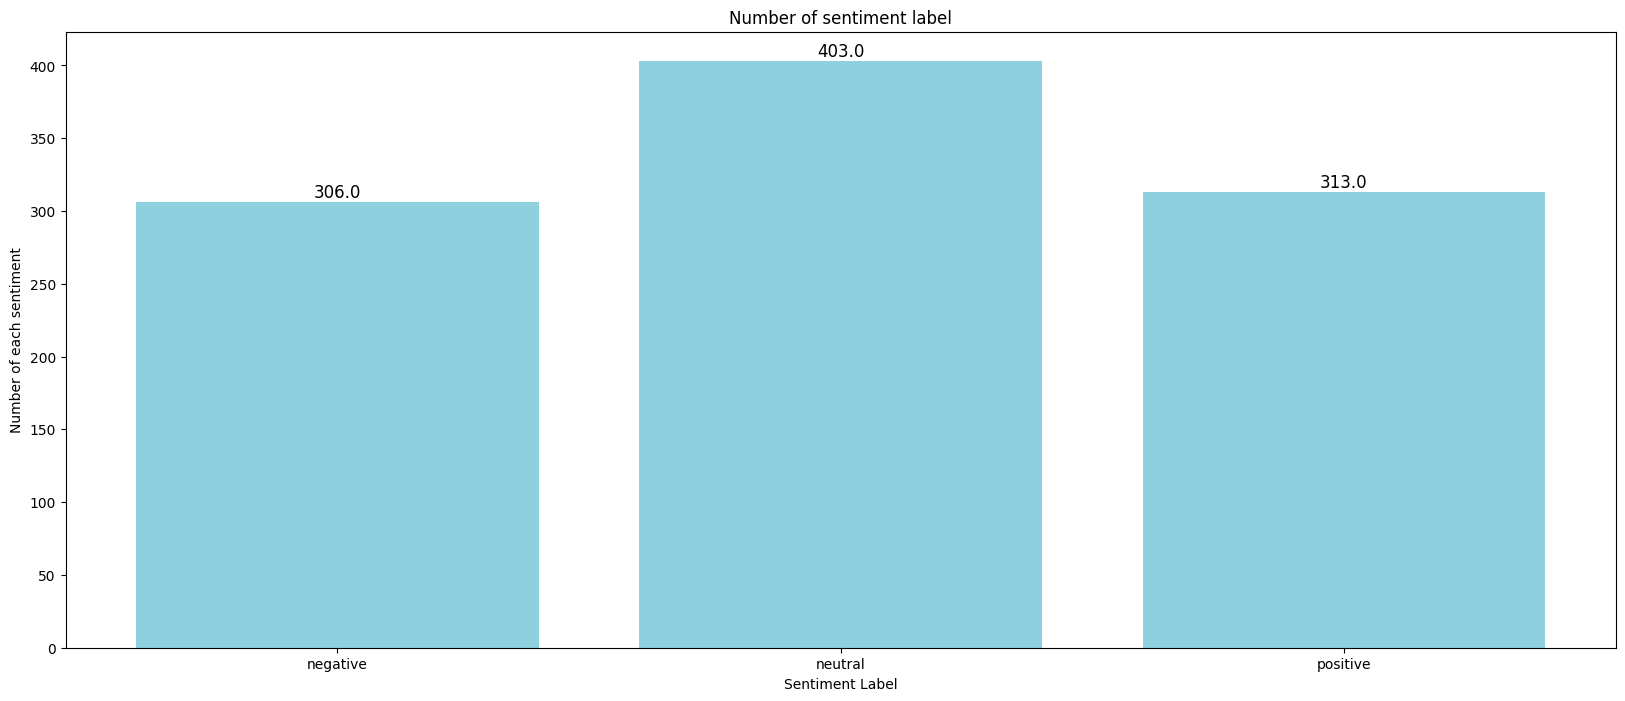

In [26]:
plt.figure(figsize=(20,8))

x = sentiment_df["sentiment_label"].value_counts().sort_index().index
y = sentiment_df["sentiment_label"].value_counts().sort_index().values
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.5, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.title("Number of sentiment label")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of each sentiment")
plt.bar(x,y,color='#8fd0df')

#### Visualize the total number of each user comment

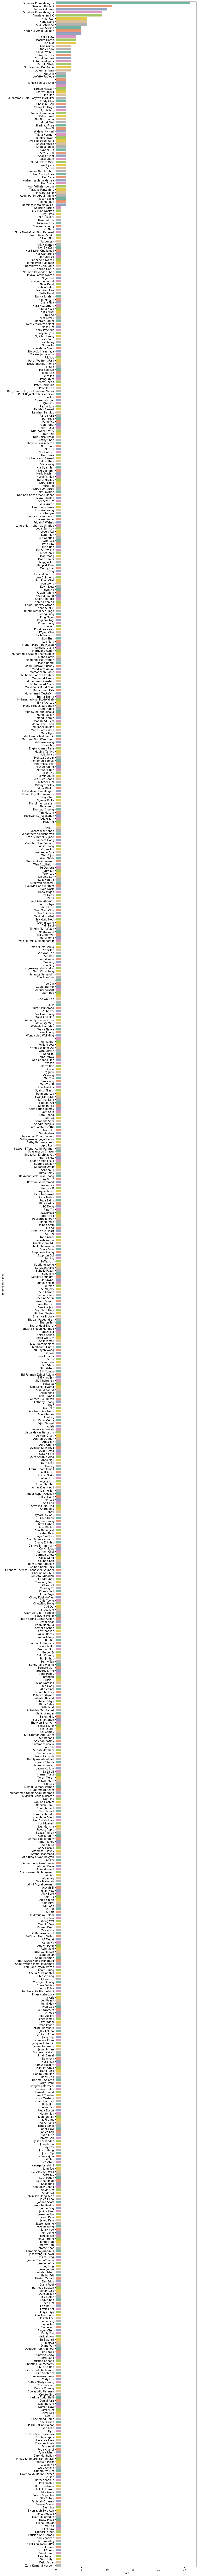

In [31]:
sdf2 = sentiment_df[(sentiment_df['commenterName'] != '"Dominos Pizza Malaysia"')&  (sentiment_df['commenterName'] != 'None')]

colunas = ['commenterName']

plt.figure(figsize=(20,150))
for i,col in enumerate(colunas):
    ax = plt.subplot(1,2,i+1)
    sns.countplot(y=sdf2[col], order=sdf2[col].value_counts().index, palette="Set2")
    plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

#### Visualize sentiment score

In [36]:
sentiment_df['Wordlength'] = sentiment_df['commentText'].apply(lambda x: len(' '.join(x).split()))
sentiment_df

,commenterName,commentText,commentYear,sentiment_score,sentiment_label,Wordlength
0,,very disappointed i order a pizza on grab from...,2022,-0.81400,negative,366
1,,i want make complain im at domino s pizza tekn...,2023,-0.20230,negative,283
2,,can order tidak for transaction,2023,0.00000,neutral,27
3,,a customer service who placed an order said no...,2023,0.00000,neutral,65
4,,perfect customer service i ordered the genshin...,2022,-0.34000,negative,207
...,...,...,...,...,...,...
1017,Zul Arashy,want nur amali solihah want nursalsabila mapus...,2023,0.10756,positive,49
1018,Zul Hz,tapi roti yang paling nipis dia bagi baru aku ...,2023,0.00000,neutral,45
1019,Zulfitri Muhamad,hari lepas saya pergi dominos pizza kemaman sa...,2023,0.57190,positive,357
1020,Zulhazmi,damansara jelatek is the best ever outlet cash...,2018,0.98760,positive,540


Text(0, 0.5, 'Label Score')

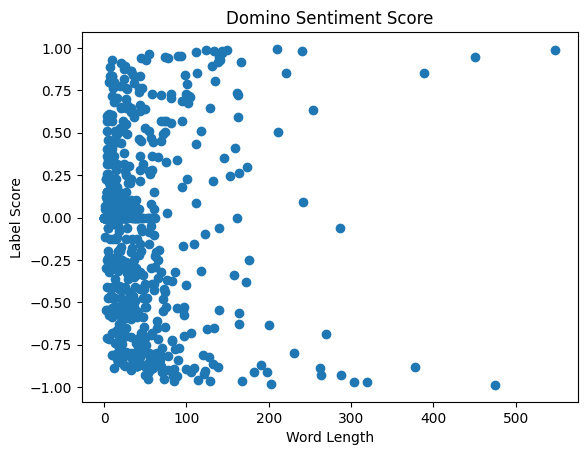

In [44]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(sentiment_df['Wordlength'], sentiment_df['sentiment_score'])
# set a title and labels
ax.set_title('Domino Sentiment Score')
ax.set_xlabel('Word Length')
ax.set_ylabel('Label Score')

Text(0, 0.5, 'Label Score')

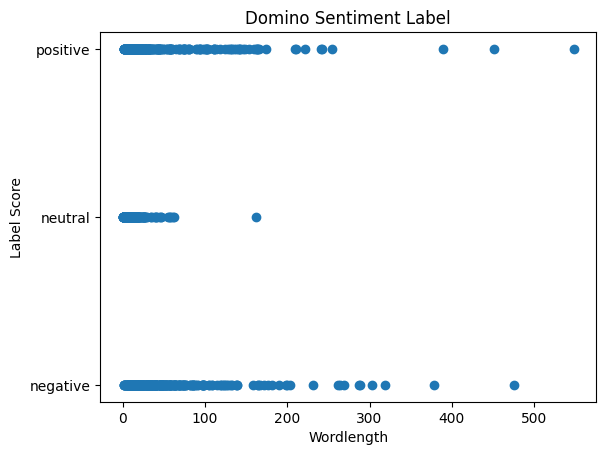

In [45]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(sentiment_df['Wordlength'], sentiment_df['sentiment_label'])
# set a title and labels
ax.set_title('Domino Sentiment Label')
ax.set_xlabel('Wordlength')
ax.set_ylabel('Label Score')

In [39]:
grouped = sentiment_df.groupby('sentiment_label')['Wordlength'].agg(['mean', 'min', 'max', 'count'])
print(grouped)

                       mean  min   max  count
sentiment_label                              
negative         246.441176    7  1978    306
neutral           41.754342    0   902    403
positive         188.769968    5  2225    313


Text(0, 0.5, 'Word Length')

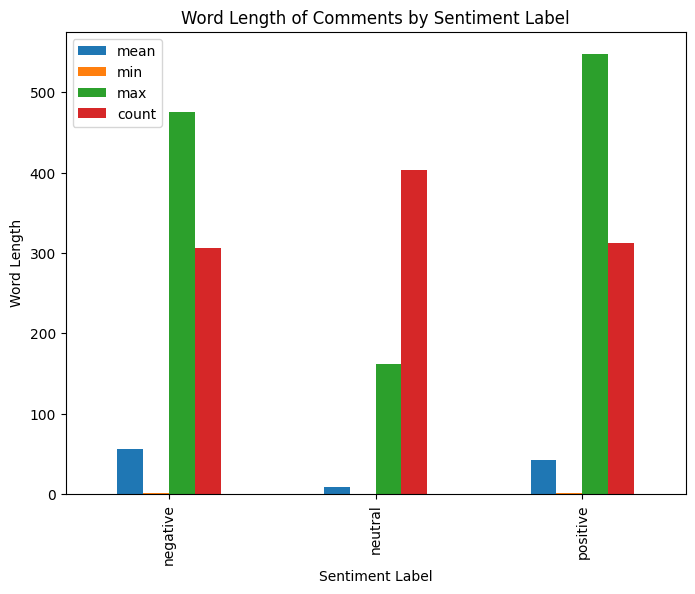

In [48]:
#Word cloud for positive, negative, neutral label
# create a figure and axis

grouped = sentiment_df.groupby('sentiment_label')['Wordlength'].agg(['mean', 'min', 'max', 'count'])
ax = grouped.plot(kind='bar', figsize=(8, 6))

# set the title and labels
ax.set_title('Word Length of Comments by Sentiment Label')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Word Length')



#### Word Cloud

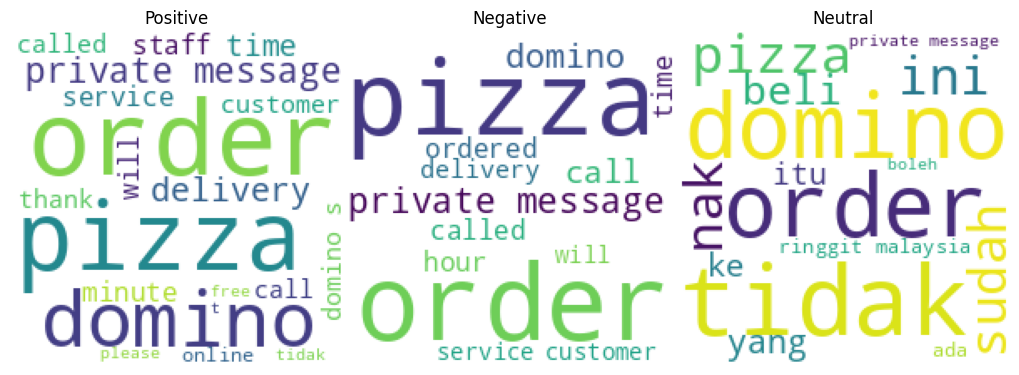

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sentiment_df with the columns commentText and sentiment_label
positive_comments = " ".join(sentiment_df[sentiment_df.sentiment_label == 'positive'].commentText)
negative_comments = " ".join(sentiment_df[sentiment_df.sentiment_label == 'negative'].commentText)
neutral_comments = " ".join(sentiment_df[sentiment_df.sentiment_label == 'neutral'].commentText)

# create a word cloud for positive comments
wordcloud = WordCloud(width = 200, height = 200, background_color ='white', stopwords = None, min_font_size = 10).generate(positive_comments)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(wordcloud)
axs[0].axis("off")
axs[0].set_title('Positive')

# create a word cloud for negative comments
wordcloud = WordCloud(width = 200, height = 200, background_color ='white', stopwords = None, min_font_size = 10).generate(negative_comments)
axs[1].imshow(wordcloud)
axs[1].axis("off")
axs[1].set_title('Negative')

# create a word cloud for neutral comments
wordcloud = WordCloud(width = 200, height = 200, background_color ='white', stopwords = None, min_font_size = 10).generate(neutral_comments)
axs[2].imshow(wordcloud)
axs[2].axis("off")
axs[2].set_title('Neutral')

plt.tight_layout(pad = 0)
plt.show()


#### Visualize total number of each sentiment label in each year

Text(0, 0.5, 'Count')

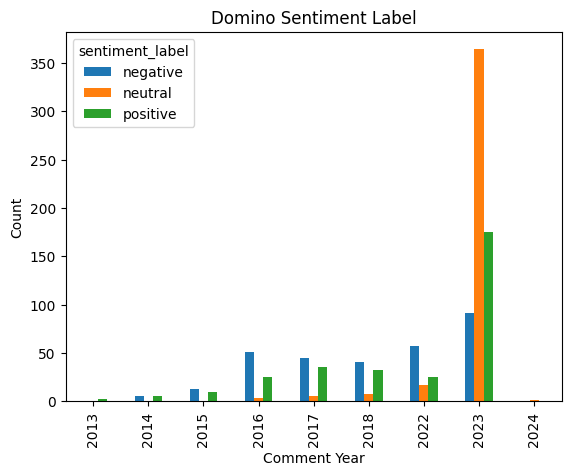

In [42]:
#how many positive/negative/neutral in each year
# create a figure and axis
fig, ax = plt.subplots()

# assuming you have a dataframe called sentiment_df with the columns commentYear and sentiment_label
grouped = sentiment_df.groupby(['commentYear', 'sentiment_label']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='commentYear', columns='sentiment_label', values='count')
pivot_table.plot(kind='bar', ax=ax)

# set the title and labels
ax.set_title('Domino Sentiment Label')
ax.set_xlabel('Comment Year')
ax.set_ylabel('Count')